# Sprint 深層学習スクラッチ ニューラルネットワーク
ニューラルネットワークスクラッチの検証にはMNISTデータセットを使用します。各種ライブラリやサイトからダウンロードできますが、ここでは深層学習フレームワークのKerasを用います。以下のコードを実行すればデータセットをダウンロードし、展開まで行えます。

In [6]:
#《データセットをダウンロードするコード》
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

**《MNISTとは？》**<br>
画像分類のための定番データセットで、手書き数字認識を行います。このデータセットには訓練用6万枚、テスト用1万枚の28×28ピクセルの白黒画像、およびそれらが0〜9のどの数字であるかというラベルが含まれています。<br>
<br>
**《画像データとは？》**<br>
デジタル画像は点の集合で、これをピクセルと呼びます。一般的に白黒画像であればピクセルには0〜255の値が含まれます。一方、カラー画像であればR（赤）、G（緑）、B（青）それぞれに対応する0〜255の値が含まれます。機械学習をする上では、この0〜255の値一つひとつが特徴量として扱われます。0〜255は符号なしの8ビット整数で表せる範囲になるため、NumPyであれば「uint8」型の変数として保持できます。<br>
<br>
### データセットの確認
どういったデータなのかを見てみます。

In [7]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

各データは28×28ピクセルの白黒画像です。

### 平滑化
(1, 28, 28)の各画像を、(1, 784)に変換します。これまで学んできた機械学習手法や、今回扱う全結合層のみのニューラルネットワークではこの形で扱います。全てのピクセルが一列になっていることを、 平滑化（flatten） してあるという風に表現します。

In [8]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

**《補足》**<br>
ここまで機械学習を学んでくる中で、特徴量の数を「次元」と呼んできました。その視点ではMNISTは784次元のデータです。一方で、NumPyのshapeが(784,)の状態を1次元配列とも呼びます。画像としての縦横の情報を持つ（28, 28)の状態であれば、2次元配列です。この視点では2次元のデータです。さらに、もしもカラー画像であれば(28, 28, 3)ということになり、3次元配列です。先ほどの視点では3次元のデータになります。しかし、白黒でもカラーでも平面画像であり、立体データではないという視点で、2次元のデータです。画像データを扱う際にはこのように「次元」という言葉が複数の意味合いで使われることに注意してください。

### 画像データの可視化
画像データを可視化します。`plt.imshow`に渡します。

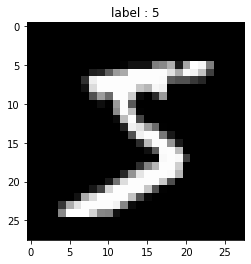

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

**《発展的話題》**<br>
画像データは符号なし8ビット整数のuint8型で保持されることが一般的ですが、plt.imshowはより自由な配列を画像として表示することが可能です。例えば、以下のようにマイナスの値を持ったfloat64型の浮動小数点であってもエラーにはならないし、先ほどと全く同じ風に表示されます。

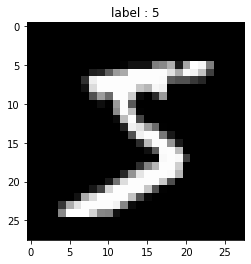

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [10]:
import numpy as np
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

これは、自動的に値を0〜255の整数に変換して処理するように作られているからです。uint8型であっても最小値が0、最大値が255でない場合には色合いがおかしくなります。それを防ぐためには次のように引数を入れてください。

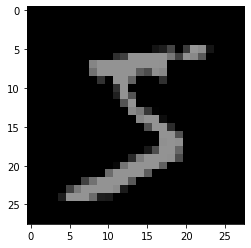

In [11]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

画像関係のライブラリではこの自動的なスケーリングが思わぬ結果を生むことがあるので、新しいメソッドを使うときには確認しておきましょう。

### 前処理
画像は0から255のuint8型で表されますが、機械学習をする上では0から1のfloat型で扱うことになります。以下のコードで変換可能です。

In [12]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


また、正解ラベルは0から9の整数ですが、ニューラルネットワークで多クラス分類を行う際には**one-hot表現**に変換します。scikit-learnのOneHotEncoderを使用したコードが以下です。このone-hot表現による値はそのラベルである確率を示していることになるため、float型で扱います。

In [13]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


さらに、訓練データ6万枚の内2割を検証データとして分割してください。訓練データが48000枚、検証データが12000枚となります。

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


## ニューラルネットワークスクラッチ
ニューラルネットワークのクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。<br>
<br>
今回は多クラス分類を行う3層のニューラルネットワークを作成します。層の数などは固定した上でニューラルネットワークの基本を学びます。次のSprintで層を自由に変えられる設計にしていきます。<br>
<br>
以下に雛形を用意してあります。このScratchSimpleNeuralNetrowkClassifierクラスにコードを書き加えていってください。

In [26]:
import copy
import time

class Linear:
    """
    線形結合
    
    Parameters
    ----------
    A_ : 次の形のndarray, shape (batch_size, n_nodes_self)
      順伝播の出力
    dZ_ : 次の形のndarray, shape (batch_size, n_nodes_prev)
      逆伝播入力に対するdZ勾配
    dw_ : 次の形のndarray, shape (n_nodes_prev, n_nodes_self)
      逆伝播入力に対するdw勾配
    db_ : 次の形のndarray, shape (n_nodes_self, )
      逆伝播入力に対するdb勾配
    """
    def __init__(self):
        self.A_ = None
        self.dZ_ = None
        self.dw_ = None
        self.db_ = None
        
    def forward(self, Z, w, b):
        """
        順伝播
        
        Parameters
        ----------
        Z : 次の形のndarray, shape (batch_size, n_nodes_prev)
          ある層に順伝播された特徴量データ
        w : 次の形のndarray, shape (n_nodes_prev, n_nodes_self)
          ある層の重み
        b : 次の形のndarray, shape (n_nodes_self, )
          ある層のバイアス
        """
        self.A_ = Z @ w + b
        
        return self.A_
    
    def backward(self, Z, w, dA):
        """
        逆伝播
        
        Parameters
        ----------
        Z : 次の形のndarray, shape (batch_size, n_nodes_prev)
          ある層に順伝播された特徴量データ
        w : 次の形のndarray, shape (n_nodes_prev, n_nodes_self)
          ある層の重み
        dA : 次の形のndarray, shape (batch_size, n_nodes_self)
          ある層に逆伝播されたAに関するLoss勾配
        """
        self.dZ_ = dA @ w.T
        self.dw_ = Z.T @ dA
        self.db_ = np.sum(dA, axis=0)
        
        return self.dZ_, self.dw_, self.db_

        
class Sigmoid:
    """
    シグモイド関数
    
    Parameters
    ----------
    Z_ : 次の形のndarray, shape (batch_size, n_nodes_self)
      順伝播の出力
    dA_ : 次の形のndarray, shape (batch_size, n_nodes_self)
      逆伝播入力に対するdA勾配
    """
    def __init__(self):
        self.Z_ = None
        self.dA_ = None
        
    def forward(self, A):
        """
        順伝播
        
        Parameters
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes_self)
          ある層に順伝播された特徴量データ
        """
        self.Z_ = 1 / (1+np.exp(-A))
        
        return self.Z_
    
    def backward(self, dZ):
        """
        逆伝播
        
        Parameters
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes_self)
          ある層に逆伝播されたZに関するLoss勾配
        """
        self.dA_ = dZ * ((1 - self.Z_) * self.Z_)
    
        return self.dA_
        
        
class Tanh:
    """
    ハイパーボリックタンジェント関数
    
    Parameters
    ----------
    Z_ : 次の形のndarray, shape (batch_size, n_nodes_self)
      順伝播の出力
    dA_ : 次の形のndarray, shape (batch_size, n_nodes_self)
      逆伝播入力に対するdA勾配
    """
    def __init__(self):
        self.Z_ = None
        self.dA_ = None
        
    def forward(self, A):
        """
        順伝播
        
        Parameters
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes_self)
          ある層に順伝播された特徴量データ
        """
        self.Z_ = np.tanh(A)
        
        return self.Z_
    
    def backward(self, dZ):
        """
        逆伝播
        
        Parameters
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes_self)
          ある層に逆伝播されたZに関するLoss勾配
        """
        self.dA_ = dZ * (1 - self.Z_**2)
        
        return self.dA_

    
class Softmax:
    """
    SoftMax関数
    
    Parameters
    ----------
    Z_ : 次の形のndarray, shape (batch_size, n_nodes_self)
      順伝播の出力
    dA_ : 次の形のndarray, shape (batch_size, n_nodes_self)
      逆伝播入力に対するdA勾配
    """
    def __init__(self):
        self.Z_ = None
        self.dA_ = None
        
    def forward(self, A):
        """
        順伝播
        
        Parameters
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes_self)
          ある層に順伝播された特徴量データ
        """
        # オーバーフロー対策として定数を引き算する
        C = np.max(A)
        self.Z_ = np.exp(A - C) / np.sum(np.exp(A - C), axis=1)[:, None]
        
        return self.Z_
    
    def backward(self, y):
        """
        逆伝播
        
        Parameters
        ----------
        y : 次の形のndarray, shape (batch_size, n_nodes_self)
          正解ラベルデータ
        """
        self.dA_ = self.Z_ - y
        
        return self.dA_
                         
        
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]
    
        
class ScratchSimpleNeuralNetworkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器
    
    Parameters
    ----------
    epoch : int
      エポック数
    lr : float
      学習率
    sigma : float
      初期パラメータ用
    n_nodes1 : int
      1層目のノード数
    n_nodes2 : int
      2層目のノード数
    n_output : int
      出力層のノード数
    batch_size : int
      ミニバッチのサンプル数
      
    Attributes
    ----------
    w : 次の形のndarray, shape (n_nodes_prev, n_nodes_self)
      重みパラメータ
    b : 次の形のndarray, shape (n_nodes_self, )
      バイアスパラメータ
    loss_train : list
      訓練データに対するLoss
    loss_val : list
      検証データに対するLoss
    verbose : bool
      学習経過の出力
    """
    
    def __init__(self, epoch=10, sigma=0.1, lr=0.1, n_nodes1=400, n_nodes2=200, n_output=10, batch_size=20, verbose=False, **kwargs):
        self.epoch = epoch
        self.lr = lr
        self.sigma = sigma
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.batch_size = batch_size
        self.w = None
        self.b = None
        self.loss_train = []
        self.loss_val = []
        self.verbose = verbose


    def _params_init(self, n_features, n_output):
        """
        3層ニューラルネット用のパラメータ初期化関数

        Returns
        -------
        w_params : list
          各層の重みを格納したリスト
        b_params : list
          各層のバイアスを格納したリスト
        """
        W1 = self.sigma * np.random.randn(n_features, self.n_nodes1)
        W2 = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        W3 = self.sigma * np.random.randn(self.n_nodes2, n_output)

        B1 = np.random.randn(self.n_nodes1)
        B2 = np.random.randn(self.n_nodes2)
        B3 = np.random.randn(n_output)

        w_params = np.array((W1, W2, W3))
        b_params = np.array((B1, B2, B3))

        return w_params, b_params
    

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, n_classes)
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, n_classes)
            検証データの正解値
        """
        w, b = self._params_init(len(X[0]), self.n_output)

        # レイヤーインスタンスを作成
        linear_1 = copy.deepcopy(Linear())
        activ_1 = copy.deepcopy(Sigmoid())
        linear_2 = copy.deepcopy(Linear())
        activ_2 = copy.deepcopy(Sigmoid())
        linear_3 = copy.deepcopy(Linear())
        softmax = copy.deepcopy(Softmax())

        
        for i in range(self.epoch):
            
            get_mini_batch_t = GetMiniBatch(X, y, batch_size=self.batch_size, seed=i)
            
            times = []
            
            start = time.time()
            
            # 各mini batchの損失をリスト化
            loss_batch_t = []
            
            for X_mini, y_mini in get_mini_batch_t:
                
                # 順伝播
                A1 = linear_1.forward(X_mini, w[0], b[0])
                Z1 = activ_1.forward(A1)

                A2 = linear_2.forward(Z1, w[1], b[1])
                Z2 = activ_2.forward(A2)

                A3 = linear_3.forward(Z2, w[2], b[2])
                Z3 = softmax.forward(A3)

                # 逆伝播
                dA3 = softmax.backward(y_mini)
                dZ2, dw3, db3 = linear_3.backward(Z2, w[2], dA3)

                dA2 = activ_2.backward(dZ2)
                dZ1, dw2, db2 = linear_2.backward(Z1, w[1], dA2)

                dA1 = activ_1.backward(dZ1)
                _, dw1, db1 = linear_1.backward(X_mini, w[0], dA1)

                # 確率的勾配降下法
                w -= self.lr * np.array((dw1, dw2, dw3)) 
                b -= self.lr * np.array((db1, db2, db3)) 
                
                # 損失関数
                loss_batch_t.append(self.cross_entropy(Z3, y_mini, len(X_mini)))
            
            # 各epochの平均損失をselfに格納
            loss_train = np.mean(loss_batch_t)
            self.loss_train.append(loss_train)
            
            
            # 検証データの推定
            if hasattr(X_val, '__array__') and hasattr(y_val, '__array__'):
                
                batch_size_v = int(self.batch_size * len(X_val)/len(X))
                get_mini_batch_v = GetMiniBatch(X_val, y_val, batch_size=batch_size_v)
                loss_batch_v = []

                for X_mini, y_mini in get_mini_batch_v:
                    A1 = linear_1.forward(X_mini, w[0], b[0])
                    Z1 = activ_1.forward(A1)

                    A2 = linear_2.forward(Z1, w[1], b[1])
                    Z2 = activ_2.forward(A2)

                    A3 = linear_3.forward(Z2, w[2], b[2])
                    Z3 = softmax.forward(A3)
                
                    loss_batch_v.append(self.cross_entropy(Z3, y_mini, len(X_mini)))
            
                # 各epochの平均損失をselfに格納
                loss_val = np.mean(loss_batch_v)
                self.loss_val.append(loss_val)
            
            end = time.time()
            
            times.append(end-start)


            if self.verbose and (i+1) % 10 == 0:
                print("Epoch {}; Loss {:.4f}".format(i+1, loss_train),
                      "  --Avg Epoch Time {:.4f}sec".format(np.mean(times)))
                
        # 全epoch終了後のパラメータを保存    
        self.w = w
        self.b = b

            
    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, )
            推定結果
        """
        A1 = Linear().forward(X, self.w[0], self.b[0])
        Z1 = Sigmoid().forward(A1)

        A2 = Linear().forward(Z1, self.w[1], self.b[1])
        Z2 = Sigmoid().forward(A2)

        A3 = Linear().forward(Z2, self.w[2], self.b[2])
        Z3 = Softmax().forward(A3)
        
        return np.argmax(Z3, axis=1)
        
    
    def cross_entropy(self, X, y, batch_size):
        """
        クロスエントロピー誤差を計算

        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_features)
          入力データ
        y : 次の形のndarray, shape (batch_size, n_classes)
          入力データの正解ラベル

        Returns
        -------
          float
          クロスエントロピー誤差
        """
        return (-1/batch_size) * np.sum((y*np.log(X)))

### ミニバッチ処理
これまでの機械学習スクラッチでは、全てのサンプルを一度に計算していました。しかし、ニューラルネットワークではデータを分割して入力する**確率的勾配降下法**が一般的です。分割した際のひとかたまりを**ミニバッチ**、そのサンプル数を**バッチサイズ**と呼びます。<br>
<br>
今回はバッチサイズを20とします。今回使う訓練データは48000枚ですから、48000÷20で2400回の更新を繰り返すことになります。ニューラルネットワークではこれを2400回**イテレーション（iteration）**すると呼びます。訓練データを一度全て見ると1回の**エポック（epoch）**が終わったことになります。このエポックを複数回繰り返し、学習が完了します。<br>
<br>
これを実現するための簡素なイテレータを用意しました。for文で呼び出すと、ミニバッチを取得できます。

In [15]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

このクラスをインスタンス化し、for文を使うことでミニバッチが取り出せます。

In [16]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)
print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
for mini_X_train, mini_y_train in get_mini_batch:
    # このfor文内でミニバッチが使える
    pass

2400
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0

`__getitem__`や`__next__`は`__init__`と同じ特殊メソッドの一種です。

### 学習
ニューラルネットワークの学習はフォワードプロパゲーションとバックプロパゲションの繰り返しになります。

## 【問題1】重みの初期値を決めるコードの作成
ニューラルネットワークの各層の重みの初期値を決めるコードを作成してください。<br>
<br>
重みの初期値は様々な方法が提案されていますが、今回はガウス分布による単純な初期化を行います。バイアスに関しても同様です。<br>
<br>
以下のコードを参考にしてください。標準偏差の値sigmaはハイパーパラメータです。発展的な重みの初期化方法については次のSprintで扱います。

In [17]:
def params_init_():
    """
    3層ニューラルネット用のパラメータ初期化関数
    
    Returns
    -------
    w_params : list
      各層の重みを格納したリスト
    b_params : list
      各層のバイアスを格納したリスト
    """
    n_features = 784
    n_nodes1 = 400
    n_nodes2 = 200
    n_output = 10
    sigma = 0.01 # ガウス分布の標準偏差

    W1 = sigma * np.random.randn(n_features, n_nodes1)
    W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
    W3 = sigma * np.random.randn(n_nodes2, n_output)

    B1 = sigma * np.random.randn(n_nodes1)
    B2 = sigma * np.random.randn(n_nodes2)
    B3 = sigma * np.random.randn(n_output)
    
    w_params = np.array((W1, W2, W3))
    b_params = np.array((B1, B2, B3))
    
    return w_params, b_params

In [19]:
w, b = params_init_()
print(w[0].shape)
print(b[0].shape)

(784, 400)
(400,)


## 【問題2】フォワードプロパゲーションの実装
三層のニューラルネットワークの フォワードプロパゲーション を作成してください。以下の説明ではノード数は1層目は400、2層目は200としますが、変更しても構いません。<br>
<br>
各層の数式を以下に示します。今回はそれぞれの記号が表す配列が、実装上どのようなndarrayのshapeになるかを併記してあります。

```
batch_size = 20 # バッチサイズ
n_features = 784 # 特徴量の数
n_nodes1 = 400 # 1層目のノード数
n_nodes2 = 200 # 2層目のノード数
n_output = 10 # 出力のクラス数（3層目のノード数）
```
<br>
<br>

#### 「1層目」
$$
A_1 = X \cdot W_1 + B_1
$$

$X$ : 特徴量ベクトル (batch_size, n_features)

$W_1$ : 1層目の重み (n_features, n_nodes1)

$B_1$ : 1層目のバイアス (n_nodes1,)

$A_1$ : 出力 (batch_size, n_nodes1)<br>
<br>

#### 「1層目の活性化関数」
$$
Z_1 = f(A_1)
$$

$f()$ : 活性化関数

$Z_1$ 出力 (batch_size, n_nodes1)<br>
<br>

#### 「2層目」
$$
A_2 = Z_1 \cdot W_2 + B_2
$$

$W_2$ : 2層目の重み (n_nodes1, n_nodes2)

$B_2$ : 2層目のバイアス (n_nodes2,)

$A_2$ : 出力 (batch_size, n_nodes2)<br>
<br>

#### 「2層目の活性化関数」
$$
Z_2 = f(A_2)
$$

$f()$ : 活性化関数

$Z_2$ 出力 (batch_size, n_nodes2)<br>
<br>

#### 「3層目（出力層）」
$$
A_3 = Z_2 \cdot W_3 + B_3
$$

$W_3$ : 3層目の重み (n_nodes2, n_output)

$B_3$ : 3層目のバイアス (n_output,)

$A_3$ : 出力 (batch_size, n_output)<br>
<br>

#### 「3層目の活性化関数」
$$
Z_3 = softmax(A_3)
$$

$softmax()$ : ソフトマックス関数

$Z_3$ 出力 (batch_size, n_output)

$Z_3$ は各ラベル（0〜9）に対する確率の配列である。

### 活性化関数（フォワードプロバゲーション）
活性化関数を作成し、フォワードプロパゲーションの中で使用します。切り替えられるように実装することを推奨しますが、片方でも構いません。

#### 「シグモイド関数」
$$
f(Z) = sigmoid(A) = \frac{1}{1+exp(-A)}
$$

指数関数 $exp(-A)$ の計算はnp.expを使用してください。<br>
<br>
#### 「ハイパボリックタンジェント関数」

次の数式で表されますが、np.tanhひとつで実現できます。

$$
f(Z) = tanh(A) = \frac{exp(A) - exp(-A)}{exp(A) + exp(-A)}
$$

＊現在ではこれらの代わりにReLUと呼ばれる活性化関数が一般的です。次のSprintで扱います。

#### ソフトマックス関数
ソフトマックス関数を作成し、フォワードプロパゲーションの中で使用します。これも活性化関数の一種ですが、多クラス分類の出力層で使われる特性上、区別して扱われることが多いです。<br>
<br>
次の数式です。

$$
Z_{3\_k} = \frac{exp(A_{3\_k})}{\sum_{i=1}^{n_c}exp(A_{3\_i})}
$$

$Z_{3_k}$ : $k$ 番目のクラスの確率ベクトル (batch_size,)

$A_{3_k}$ : $k$ 番目のクラスにあたる前の層からのベクトル (batch_size,)

$n_c$ : クラスの数、n_output。今回のMNISTでは10。

分母は全てのクラスに相当する値を指数関数に通した上で足し合わせたものです。その中で、分子に $k$ 番目のクラスを持ってくることで、 $k$ 番目のクラスである確率が求まります。<br>
<br>
これを10クラス分計算し、合わせたものが $Z_3$ です。

In [20]:
class Linear:
    """
    線形結合
    
    Parameters
    ----------
    A_ : 次の形のndarray, shape (batch_size, n_nodes_self)
      順伝播の出力
    """
    def __init__(self):
        self.A_ = None
        
    def forward(self, Z, w, b):
        """
        順伝播
        
        Parameters
        ----------
        Z : 次の形のndarray, shape (batch_size, n_nodes_prev)
          ある層に順伝播された特徴量データ
        w : 次の形のndarray, shape (n_nodes_prev, n_nodes_self)
          ある層の重み
        b : 次の形のndarray, shape (n_nodes_self, )
          ある層のバイアス
        """
        self.A_ = Z @ w + b
        
        return self.A_
    
        
class Sigmoid:
    """
    シグモイド関数
    
    Parameters
    ----------
    Z_ : 次の形のndarray, shape (batch_size, n_nodes_self)
      順伝播の出力
    """
    def __init__(self):
        self.Z_ = None
        
    def forward(self, A):
        """
        順伝播
        
        Parameters
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes_self)
          ある層に順伝播された特徴量データ
        """
        self.Z_ = 1 / (1+np.exp(-A))
        
        return self.Z_
    
        
class Tanh:
    """
    ハイパーボリックタンジェント関数
    
    Parameters
    ----------
    Z_ : 次の形のndarray, shape (batch_size, n_nodes_self)
      順伝播の出力
    """
    def __init__(self):
        self.Z_ = None
        
    def forward(self, A):
        """
        順伝播
        
        Parameters
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes_self)
          ある層に順伝播された特徴量データ
        """
        self.Z_ = np.tanh(A)
        
        return self.Z_

    
class Softmax:
    """
    SoftMax関数
    
    Parameters
    ----------
    Z_ : 次の形のndarray, shape (batch_size, n_nodes_self)
      順伝播の出力
    """
    def __init__(self):
        self.Z_ = None
        
    def forward(self, A):
        """
        順伝播
        
        Parameters
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes_self)
          ある層に順伝播された特徴量データ
        """
        # オーバーフロー対策として定数を引き算する
        C = np.max(A)
        self.Z_ = np.exp(A - C) / np.sum(np.exp(A - C), axis=1)[:, None]
        
        return self.Z_
                         

def fit(X):
    """
    ニューラルネットワーク分類器を学習する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量
    """
    w, b = params_init_()
    
    # レイヤーインスタンスを作成
    linear_1 = Linear()
    sigmoid_1 = Sigmoid()
    linear_2 = Linear()
    sigmoid_2 = Sigmoid()
    linear_3 = Linear()
    softmax = Softmax()
    
    A1 = linear_1.forward(X, w[0], b[0])
    print(A1.shape)
    Z1 = sigmoid_1.forward(A1)
    print(Z1.shape)
    A2 = linear_2.forward(Z1, w[1], b[1])
    print(A2.shape)
    Z2 = sigmoid_2.forward(A2)
    print(Z2.shape)
    A3 = linear_3.forward(Z2, w[2], b[2])
    print(A3.shape)
    Z3 = softmax.forward(A3)

In [21]:
fit(X_train)

(48000, 400)
(48000, 400)
(48000, 200)
(48000, 200)
(48000, 10)


## 【問題3】交差エントロピー誤差の実装
目的関数（損失関数）を作成します。<br>
<br>
多クラス分類の目的関数である交差エントロピー誤差 $L$ は次の数式です。

$$
L = - \frac{1}{n_b}\sum_{j}^{n_b}\sum_{k}^{n_c}y_{jk} log(z_{3\_jk})
$$

$y_{ij}$ : $j$ 番目のサンプルの $k$ 番目のクラスの正解ラベル（one-hot表現で0か1のスカラー）

$z_{3_ij}$ : $j$ 番目のサンプルの $k$ 番目のクラスの確率（スカラー）

$n_{b}$ : バッチサイズ、batch_size

$n_{c}$ : クラスの数、n_output（今回のMNISTでは10）

サンプル1つあたりの誤差が求まります。

In [22]:
def cross_entropy(X, y, batch_size):
    """
    クロスエントロピー誤差を計算

    Parameters
    ----------
    X : 次の形のndarray, shape (batch_size, n_features)
      入力データ
    y : 次の形のndarray, shape (batch_size, n_classes)
      入力データの正解ラベル

    Returns
    -------
      float
      クロスエントロピー誤差
    """
    return (-1/batch_size) * np.sum((y*np.log(X)))

## 【問題4】バックプロパゲーションの実装
三層のニューラルネットワークのバックプロパゲーションを作成してください。確率的勾配降下法を行う部分です。<br>
<br>
数式を以下に示します。<br>
<br>
まず、i層目の重みとバイアスの更新式です。 $W_i$ と $B_i$ に対し、更新後の $W_i^{\prime}$ と $B_i^{\prime}$ は次の数式で求められます。

$$
W_i^{\prime} = W_i - \alpha \frac{\partial L}{\partial W_i} \\
B_i^{\prime} = B_i - \alpha \frac{\partial L}{\partial B_i}
$$

$\alpha$ : 学習率（層ごとに変えることも可能だが、基本的には全て同じとする）

$\frac{\partial L}{\partial W_i}$ : $W_i$ に関する損失 $L$ の勾配

$\frac{\partial L}{\partial B_i}$ : $B_i$ に関する損失 $L$ の勾配

＊この勾配はミニバッチのサンプル数分の合計または平均を考えます。ここでは合計を計算します。<br>
<br>
この更新方法はSprint3線形回帰やsprint4ロジスティック回帰における最急降下法と同様です。より効果的な更新方法が知られており、それは次のSprintで扱います。<br>
<br>
勾配 $\frac{\partial L}{\partial W_i}$ や $\frac{\partial L}{\partial B_i}$ を求めるために、バックプロパゲーションを行います。以下の数式です。ハイパボリックタンジェント関数を使用した例を載せました。シグモイド関数の場合の数式はその後ろにあります。

#### 「３層目」

$$
\frac{\partial L}{\partial A_3} = Z_{3} - Y\\
\frac{\partial L}{\partial B_3} = \sum_{j}^{n_b}\frac{\partial L}{\partial A_{3_j}}\\
\frac{\partial L}{\partial W_3} = Z_{2}^{T}\cdot \frac{\partial L}{\partial A_3}\\
\frac{\partial L}{\partial Z_2} = \frac{\partial L}{\partial A_3} \cdot W_3^T
$$

$\frac{\partial L}{\partial A_3}$ : $A_3$ に関する損失 $L$ の勾配 (batch_size, n_output)

$\frac{\partial L}{\partial A_{3_j}}$ : j番目のサンプルの$A_3$ に関する損失 $L$ の勾配 (n_output,)

$\frac{\partial L}{\partial B_3}$ : $B_3$ に関する損失 $L$ の勾配 (n_output,)

$\frac{\partial L}{\partial W_3}$ : $W_3$ に関する損失 $L$ の勾配 (n_nodes2, n_output)

$\frac{\partial L}{\partial Z_2}$ : $Z_2$ に関する損失 $L$ の勾配 (batch_size, n_nodes2)

$Z_{3}$ : ソフトマックス関数の出力 (batch_size, n_nodes2)

$Y$ : 正解ラベル (batch_size, n_output)

$Z_{2}$ : 2層目の活性化関数の出力 (batch_size, n_nodes2)

$W_3$ : 3層目の重み (n_nodes2, n_output)<br>
<br>

#### 「２層目」

$$
\frac{\partial L}{\partial A_2} = \frac{\partial L}{\partial Z_2} \odot \{1-tanh^2(A_{2})\}\\
\frac{\partial L}{\partial B_2} = \sum_{j}^{n_b}\frac{\partial L}{\partial A_{2_j}}\\
\frac{\partial L}{\partial W_2} = Z_{1}^T \cdot \frac{\partial L}{\partial A_2}\\
\frac{\partial L}{\partial Z_1} = \frac{\partial L}{\partial A_2} \cdot W_2^T
$$

$\frac{\partial L}{\partial A_2}$ : $A_2$ に関する損失 $L$ の勾配 (batch_size, n_nodes2)

$\frac{\partial L}{\partial A_{2_j}}$ : j番目のサンプルの$A_2$ に関する損失 $L$ の勾配 (n_nodes2,)

$\frac{\partial L}{\partial B_2}$ : $B_2$ に関する損失 $L$ の勾配 (n_nodes2,)

$\frac{\partial L}{\partial W_2}$ : $W_2$ に関する損失 $L$ の勾配 (n_nodes1, n_nodes2)

$\frac{\partial L}{\partial Z_2}$ : $Z_2$ に関する損失 $L$ の勾配 (batch_size, n_nodes2)

$A_2$ : 2層目の出力 (batch_size, n_nodes2)

$Z_{1}$ : 1層目の活性化関数の出力 (batch_size, n_nodes1)

$W_2$ : 2層目の重み (n_nodes1, n_nodes2)<br>
<br>

#### 「１層目」

$$
\frac{\partial L}{\partial A_1} = \frac{\partial L}{\partial Z_1} \odot \{1-tanh^2(A_{1})\}\\
\frac{\partial L}{\partial B_1} = \sum_{j}^{n_b}\frac{\partial L}{\partial A_{1\_j}}\\
\frac{\partial L}{\partial W_1} = X^T \cdot \frac{\partial L}{\partial A_1}\\
$$

$\frac{\partial L}{\partial A_1}$ : $A_1$ に関する損失 $L$ の勾配 (batch_size, n_nodes1)

$\frac{\partial L}{\partial A_{1_j}}$ : j番目のサンプルの$A_1$ に関する損失 $L$ の勾配 (n_nodes1,)

$\frac{\partial L}{\partial B_1}$ : $B_1$ に関する損失 $L$ の勾配 (n_nodes1,)

$\frac{\partial L}{\partial W_1}$ : $W_1$ に関する損失 $L$ の勾配 (n_features, n_nodes1)

$\frac{\partial L}{\partial Z_1}$ : $Z_1$ に関する損失 $L$ の勾配 (batch_size, n_nodes1)

$A_1$ : 1層目の出力 (batch_size, n_nodes1)

$X$ : 特徴量ベクトル (batch_size, n_features)

$W_1$ : 1層目の重み (n_features, n_nodes1)<br>
<br>

**《補足》**<br>
活性化関数にシグモイド関数を使用した場合は、次のようになります。

$$
\frac{\partial L}{\partial A_2} = \frac{\partial L}{\partial Z_2} \odot  \{1-sigmoid(A_{2})\}sigmoid(A_{2})
\\
\frac{\partial L}{\partial A_1} = \frac{\partial L}{\partial Z_1} \odot  \{1-sigmoid(A_{1})\}sigmoid(A_{1})
$$

>各活性化関数と線形結合関数に逆伝播メソッドを追記した。併せて、fitメソッドで呼び出せるよう同様に逆伝播メソッドを追加。

In [97]:
class Linear:
    """
    線形結合
    
    Parameters
    ----------
    A_ : 次の形のndarray, shape (batch_size, n_nodes_self)
      順伝播の出力
    dZ_ : 次の形のndarray, shape (batch_size, n_nodes_prev)
      逆伝播入力に対するdZ勾配
    dw_ : 次の形のndarray, shape (n_nodes_prev, n_nodes_self)
      逆伝播入力に対するdw勾配
    db_ : 次の形のndarray, shape (n_nodes_self, )
      逆伝播入力に対するdb勾配
    """
    def __init__(self):
        self.A_ = None
        self.dZ_ = None
        self.dw_ = None
        self.db_ = None
        
    def forward(self, Z, w, b):
        """
        順伝播
        
        Parameters
        ----------
        Z : 次の形のndarray, shape (batch_size, n_nodes_prev)
          ある層に順伝播された特徴量データ
        w : 次の形のndarray, shape (n_nodes_prev, n_nodes_self)
          ある層の重み
        b : 次の形のndarray, shape (n_nodes_self, )
          ある層のバイアス
        """
        self.A_ = Z @ w + b
        
        return self.A_
    
    def backward(self, Z, w, dA):
        """
        逆伝播
        
        Parameters
        ----------
        Z : 次の形のndarray, shape (batch_size, n_nodes_prev)
          ある層に順伝播された特徴量データ
        w : 次の形のndarray, shape (n_nodes_prev, n_nodes_self)
          ある層の重み
        dA : 次の形のndarray, shape (batch_size, n_nodes_self)
          ある層に逆伝播されたAに関するLoss勾配
        """
        self.dZ_ = dA @ w.T
        self.dw_ = Z.T @ dA
        self.db_ = np.sum(dA, axis=0)
        
        return self.dZ_, self.dw_, self.db_

        
class Sigmoid:
    """
    シグモイド関数
    
    Parameters
    ----------
    Z_ : 次の形のndarray, shape (batch_size, n_nodes_self)
      順伝播の出力
    dA_ : 次の形のndarray, shape (batch_size, n_nodes_self)
      逆伝播入力に対するdA勾配
    """
    def __init__(self):
        self.Z_ = None
        self.dA_ = None
        
    def forward(self, A):
        """
        順伝播
        
        Parameters
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes_self)
          ある層に順伝播された特徴量データ
        """
        self.Z_ = 1 / (1+np.exp(-A))
        
        return self.Z_
    
    def backward(self, dZ):
        """
        逆伝播
        
        Parameters
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes_self)
          ある層に逆伝播されたZに関するLoss勾配
        """
        self.dA_ = dZ * ((1 - self.Z_) * self.Z_)
    
        return self.dA_
        
        
class Tanh:
    """
    ハイパーボリックタンジェント関数
    
    Parameters
    ----------
    Z_ : 次の形のndarray, shape (batch_size, n_nodes_self)
      順伝播の出力
    dA_ : 次の形のndarray, shape (batch_size, n_nodes_self)
      逆伝播入力に対するdA勾配
    """
    def __init__(self):
        self.Z_ = None
        self.dA_ = None
        
    def forward(self, A):
        """
        順伝播
        
        Parameters
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes_self)
          ある層に順伝播された特徴量データ
        """
        self.Z_ = np.tanh(A)
        
        return self.Z_
    
    def backward(self, dZ):
        """
        逆伝播
        
        Parameters
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes_self)
          ある層に逆伝播されたZに関するLoss勾配
        """
        self.dA_ = dZ * (1 - self.Z_**2)
        
        return self.dA_

    
class Softmax:
    """
    SoftMax関数
    
    Parameters
    ----------
    Z_ : 次の形のndarray, shape (batch_size, n_nodes_self)
      順伝播の出力
    dA_ : 次の形のndarray, shape (batch_size, n_nodes_self)
      逆伝播入力に対するdA勾配
    """
    def __init__(self):
        self.Z_ = None
        self.dA_ = None
        
    def forward(self, A):
        """
        順伝播
        
        Parameters
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes_self)
          ある層に順伝播された特徴量データ
        """
        # オーバーフロー対策として定数を引き算する
        C = np.max(A)
        self.Z_ = np.exp(A - C) / np.sum(np.exp(A - C), axis=1)[:, None]
        
        return self.Z_
    
    def backward(self, y):
        """
        逆伝播
        
        Parameters
        ----------
        y : 次の形のndarray, shape (batch_size, n_nodes_self)
          正解ラベルデータ
        """
        self.dA_ = self.Z_ - y
        
        return self.dA_
                         

def fit(X, y, num_iter, lr=0.1, verbose=False):
    """
    ニューラルネットワーク分類器を学習する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データの特徴量
    y : 次の形のndarray, shape (n_samples, n_classes)
      訓練データの正解値
    num_iter : int
      イテレーション数
    lr : float
      学習率
    verbose : bool
      学習経過の出力
    """
    w, b = params_init_()
    y = y.reshape(-1, 1)
    
    # レイヤーインスタンスを作成
    linear_1 = Linear()
    sigmoid_1 = Sigmoid()
    linear_2 = Linear()
    sigmoid_2 = Sigmoid()
    linear_3 = Linear()
    softmax = Softmax()
    
    progress = []
    
    for i in range(num_iter):
    
        # 順伝播
        A1 = linear_1.forward(X, w[0], b[0])
        Z1 = sigmoid_1.forward(A1)
        
        A2 = linear_2.forward(Z1, w[1], b[1])
        Z2 = sigmoid_2.forward(A2)
        
        A3 = linear_3.forward(Z2, w[2], b[2])
        Z3 = softmax.forward(A3)
        
        # 逆伝播
        dA3 = softmax.backward(y)
        dZ2, dw3, db3 = linear_3.backward(Z2, w[2], dA3)
        
        dA2 = sigmoid_2.backward(dZ2)
        dZ1, dw2, db2 = linear_2.backward(Z1, w[1], dA2)

        dA1 = sigmoid_1.backward(dZ1)
        _, dw1, db1 = linear_1.backward(X, w[0], dA1)
        
        # 確率的勾配降下法
        w -= lr * np.array((dw1, dw2, dw3)) 
        b -= lr * np.array((db1, db2, db3)) 
        print(w)
        
        #損失関数
        loss = calc_loss(Z3, y, len(X))
        progress.append(loss)
        
        if verbose:
            print("Iteration {}; Loss {:.4f}".format(i+1, loss))
        
    return Z3

## 【問題５】推定
推定を行うメソッドを作成してください。<br>
<br>
フォワードプロパゲーションによって出力された10個の確率の中で、最も高いものはどれかを判定します。

In [198]:
def predict(self, X):
    """
    ニューラルネットワーク分類器を使い推定する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        サンプル

    Returns
    -------
        次の形のndarray, shape (n_samples, )
        推定結果
    """

    A1 = Linear().forward(X, self.w[0], self.b[0])
    Z1 = Sigmoid().forward(A1)

    A2 = Linear().forward(Z1, self.w[1], self.b[1])
    Z2 = Sigmoid().forward(A2)

    A3 = Linear().forward(Z2, self.w[2], self.b[2])
    Z3 = Softmax().forward(A3)

    return np.argmax(Z3, axis=1)

## 【問題6】学習と推定
MNISTのデータを学習・推定し、Accuracyを計算してください。

In [386]:
from sklearn.metrics import accuracy_score

params = {'epoch': 100, 
          'lr': 0.01,
          'sigma':  0.1,
          'batch_size': 200}
print(params)

scratch_nn = ScratchSimpleNeuralNetworkClassifier(verbose=True, **params)
scratch_nn.fit(X_train, y_train, X_val, y_val)

pred = scratch_nn.predict(X_test)

print("\n Accuracy: {}".format(accuracy_score(y_test, pred)))

{'epoch': 100, 'lr': 0.01, 'sigma': 0.1, 'batch_size': 200}
Epoch 10; Loss 0.0596   --Avg Epoch Time 1.3349sec
Epoch 20; Loss 0.0149   --Avg Epoch Time 1.4658sec
Epoch 30; Loss 0.0043   --Avg Epoch Time 1.5356sec
Epoch 40; Loss 0.0020   --Avg Epoch Time 1.5680sec
Epoch 50; Loss 0.0012   --Avg Epoch Time 1.4705sec
Epoch 60; Loss 0.0009   --Avg Epoch Time 1.4570sec
Epoch 70; Loss 0.0006   --Avg Epoch Time 1.4186sec
Epoch 80; Loss 0.0005   --Avg Epoch Time 1.4142sec
Epoch 90; Loss 0.0004   --Avg Epoch Time 1.4242sec
Epoch 100; Loss 0.0004   --Avg Epoch Time 1.4117sec

 Accuracy: 0.9813


## 【問題７】学習曲線のプロット 
学習曲線をプロットしてください。<br>
<br>
ニューラルネットワークは過学習が発生しやすいため、学習曲線の確認が重要です。訓練データと検証データに対するエポックごとの損失（交差エントロピー誤差）を記録できるようにする必要があります。

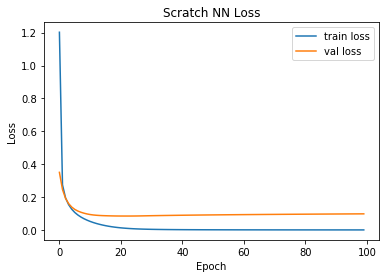

In [390]:
%matplotlib inline

import matplotlib.pyplot as plt

def plot_loss(model, title='Scratch NN Loss'):
    plt.figure()

    plt.plot(np.arange(len(model.loss_train)), model.loss_train, label='train loss')
    plt.plot(np.arange(len(model.loss_val)), model.loss_val, label='val loss')
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()
    
plot_loss(scratch_nn)

>過学習が起きていることが分かる。改善するには、正則化項の実装などが考えられる。

## 【問題8】（アドバンス課題）誤分類の確認
誤分類した画像はどのようなものだったかを確認してください。推定値を用意し、以下のコードを実行してください。

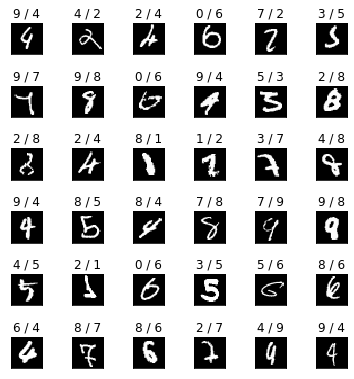

In [388]:
"""
誤分類結果を並べて表示する。画像の上の表示は「推定結果/正解」である。

Parameters:
----------
y_pred : 推定値のndarray (n_samples,)
y_val : 検証データの正解ラベル(n_samples,)
X_val : 検証データの特徴量（n_samples, n_features)
"""
import numpy as np
import matplotlib.pyplot as plt
num = 36 # いくつ表示するか
true_false = pred==y_test
false_list = np.where(true_false==False)[0].astype(np.int)
if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.patch.set_facecolor('white')
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(pred[false_list[i]],y_test[false_list[i]]))
    ax.imshow(X_test.reshape(-1,28,28)[false_list[i]], cmap='gray')

>誤分類の傾向として、文字が掠れているものや、丸などが閉じていないものが誤認される場合が多い。

### 【自己学習】パラメータ調整の検証

>下記パラメータ調整を行い、学習に対する影響を検証する。
>- バッチ数の増加
>- ノード数の増加
>- ノード数の減少

{'epoch': 100, 'lr': 0.01, 'sigma': 0.1, 'batch_size': 1000}


/Users/tamiyagt/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Epoch 10; Loss 8.3097   --Avg Epoch Time 1.5294sec
Epoch 20; Loss 6.7109   --Avg Epoch Time 1.5184sec
Epoch 30; Loss 18.8856   --Avg Epoch Time 1.6357sec
Epoch 40; Loss 18.0100   --Avg Epoch Time 1.4305sec
Epoch 50; Loss 24.7915   --Avg Epoch Time 1.5615sec
Epoch 60; Loss 29.0385   --Avg Epoch Time 1.5656sec
Epoch 70; Loss 39.6299   --Avg Epoch Time 1.9556sec
Epoch 80; Loss 43.8092   --Avg Epoch Time 1.3457sec
Epoch 90; Loss 46.7675   --Avg Epoch Time 1.3248sec
Epoch 100; Loss 43.5052   --Avg Epoch Time 1.3582sec

 Accuracy: 0.1009


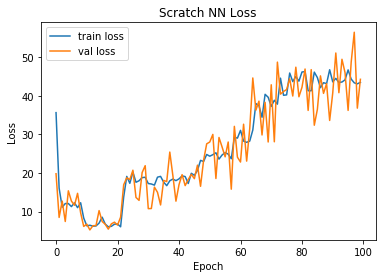

In [391]:
# バッチサイズ増加
params = {'epoch': 100, 
          'lr': 0.01,
          'sigma':  0.1,
          'batch_size': 1000
          }
print(params)

nn_samp1 = ScratchSimpleNeuralNetworkClassifier(verbose=True, **params)
nn_samp1.fit(X_train, y_train, X_val, y_val)

pred = nn_samp1.predict(X_test)

print("\n Accuracy: {}".format(accuracy_score(y_test, pred)))

plot_loss(nn_samp1)

>バッチサイズの増加は学習精度を下げた。おそらく、バッチサイズが大きくなるにつれて最適パラメータが平均化されてしまい、局所解に陥りやすくなると思われる。

{'epoch': 100, 'lr': 0.01, 'sigma': 0.1, 'batch_size': 200, 'n_nodes1': 800, 'n_nodes2': 400}
Epoch 10; Loss 0.0664   --Avg Epoch Time 4.1288sec
Epoch 20; Loss 0.0201   --Avg Epoch Time 4.3826sec
Epoch 30; Loss 0.0061   --Avg Epoch Time 4.4184sec
Epoch 40; Loss 0.0026   --Avg Epoch Time 5.8095sec
Epoch 50; Loss 0.0016   --Avg Epoch Time 4.1398sec
Epoch 60; Loss 0.0011   --Avg Epoch Time 4.2223sec
Epoch 70; Loss 0.0008   --Avg Epoch Time 5.0911sec
Epoch 80; Loss 0.0007   --Avg Epoch Time 5.7828sec
Epoch 90; Loss 0.0005   --Avg Epoch Time 4.6949sec
Epoch 100; Loss 0.0005   --Avg Epoch Time 4.2283sec

 Accuracy: 0.9814


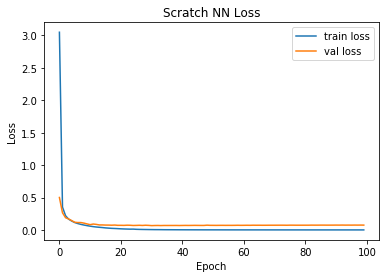

In [34]:
# ノード数を倍増
params = {'epoch': 100, 
          'lr': 0.01,
          'sigma':  0.1,
          'batch_size': 200,
          'n_nodes1': 800,
          'n_nodes2': 400}
print(params)

nn_samp2 = ScratchSimpleNeuralNetworkClassifier(verbose=True, **params)
nn_samp2.fit(X_train, y_train, X_val, y_val)

pred = nn_samp2.predict(X_test)

print("\n Accuracy: {}".format(accuracy_score(y_test, pred)))

plot_loss(nn_samp2)

In [29]:
from sklearn.metrics import accuracy_score

>ノード数の増加は学習精度にあまり影響はなかったが、損失の収束はかなり早まった。

{'epoch': 100, 'lr': 0.01, 'sigma': 0.1, 'batch_size': 200, 'n_nodes1': 40, 'n_nodes2': 20}
Epoch 10; Loss 0.0834   --Avg Epoch Time 0.2129sec
Epoch 20; Loss 0.0395   --Avg Epoch Time 0.2049sec
Epoch 30; Loss 0.0206   --Avg Epoch Time 0.1845sec
Epoch 40; Loss 0.0099   --Avg Epoch Time 0.2156sec
Epoch 50; Loss 0.0051   --Avg Epoch Time 0.1789sec
Epoch 60; Loss 0.0031   --Avg Epoch Time 0.2041sec
Epoch 70; Loss 0.0023   --Avg Epoch Time 0.2017sec
Epoch 80; Loss 0.0017   --Avg Epoch Time 0.1936sec
Epoch 90; Loss 0.0014   --Avg Epoch Time 0.2045sec
Epoch 100; Loss 0.0011   --Avg Epoch Time 0.1908sec

 Accuracy: 0.9674


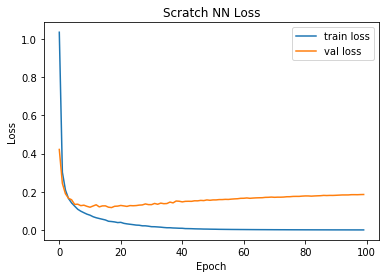

In [32]:
# ノード数を減少
params = {'epoch': 100, 
          'lr': 0.01,
          'sigma':  0.1,
          'batch_size': 200,
          'n_nodes1': 40,
          'n_nodes2': 20}
print(params)

nn_samp3 = ScratchSimpleNeuralNetworkClassifier(verbose=True, **params)
nn_samp3.fit(X_train, y_train, X_val, y_val)

pred = nn_samp3.predict(X_test)

print("\n Accuracy: {}".format(accuracy_score(y_test, pred)))

plot_loss(nn_samp3)

>ノード数の減少により、推定精度は下がり、収束にかかったエポック数も増えた。

### 【自己学習】任意層数のニューラルネットワーク実装

In [ ]:
import time

class Linear:
    """
    線形結合
    
    Parameters
    ----------
    A_ : 次の形のndarray, shape (batch_size, n_nodes_self)
      順伝播の出力
    dZ_ : 次の形のndarray, shape (batch_size, n_nodes_prev)
      逆伝播入力に対するdZ勾配
    dw_ : 次の形のndarray, shape (n_nodes_prev, n_nodes_self)
      逆伝播入力に対するdw勾配
    db_ : 次の形のndarray, shape (n_nodes_self, )
      逆伝播入力に対するdb勾配
    """
    def __init__(self):
        self.A_ = None
        self.dZ_ = None
        self.dw_ = None
        self.db_ = None
        
    def forward(self, Z, w, b):
        """
        順伝播
        
        Parameters
        ----------
        Z : 次の形のndarray, shape (batch_size, n_nodes_prev)
          ある層に順伝播された特徴量データ
        w : 次の形のndarray, shape (n_nodes_prev, n_nodes_self)
          ある層の重み
        b : 次の形のndarray, shape (n_nodes_self, )
          ある層のバイアス
        """
        self.A_ = Z @ w + b
        
        return self.A_
    
    def backward(self, Z, w, dA):
        """
        逆伝播
        
        Parameters
        ----------
        Z : 次の形のndarray, shape (batch_size, n_nodes_prev)
          ある層に順伝播された特徴量データ
        w : 次の形のndarray, shape (n_nodes_prev, n_nodes_self)
          ある層の重み
        dA : 次の形のndarray, shape (batch_size, n_nodes_self)
          ある層に逆伝播されたAに関するLoss勾配
        """
        self.dZ_ = dA @ w.T
        self.dw_ = Z.T @ dA
        self.db_ = np.sum(dA, axis=0)
        
        return self.dZ_, self.dw_, self.db_

        
class Sigmoid:
    """
    シグモイド関数
    
    Parameters
    ----------
    Z_ : 次の形のndarray, shape (batch_size, n_nodes_self)
      順伝播の出力
    dA_ : 次の形のndarray, shape (batch_size, n_nodes_self)
      逆伝播入力に対するdA勾配
    """
    def __init__(self):
        self.Z_ = None
        self.dA_ = None
        
    def forward(self, A):
        """
        順伝播
        
        Parameters
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes_self)
          ある層に順伝播された特徴量データ
        """
        self.Z_ = 1 / (1+np.exp(-A))
        
        return self.Z_
    
    def backward(self, dZ):
        """
        逆伝播
        
        Parameters
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes_self)
          ある層に逆伝播されたZに関するLoss勾配
        """
        self.dA_ = dZ * ((1 - self.Z_) * self.Z_)
    
        return self.dA_
        
        
class Tanh:
    """
    ハイパーボリックタンジェント関数
    
    Parameters
    ----------
    Z_ : 次の形のndarray, shape (batch_size, n_nodes_self)
      順伝播の出力
    dA_ : 次の形のndarray, shape (batch_size, n_nodes_self)
      逆伝播入力に対するdA勾配
    """
    def __init__(self):
        self.Z_ = None
        self.dA_ = None
        
    def forward(self, A):
        """
        順伝播
        
        Parameters
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes_self)
          ある層に順伝播された特徴量データ
        """
        self.Z_ = np.tanh(A)
        
        return self.Z_
    
    def backward(self, dZ):
        """
        逆伝播
        
        Parameters
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes_self)
          ある層に逆伝播されたZに関するLoss勾配
        """
        self.dA_ = dZ * (1 - self.Z_**2)
        
        return self.dA_

    
class Softmax:
    """
    SoftMax関数
    
    Parameters
    ----------
    Z_ : 次の形のndarray, shape (batch_size, n_nodes_self)
      順伝播の出力
    dA_ : 次の形のndarray, shape (batch_size, n_nodes_self)
      逆伝播入力に対するdA勾配
    """
    def __init__(self):
        self.Z_ = None
        self.dA_ = None
        
    def forward(self, A):
        """
        順伝播
        
        Parameters
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes_self)
          ある層に順伝播された特徴量データ
        """
        # オーバーフロー対策として定数を引き算する
        C = np.max(A)
        self.Z_ = np.exp(A - C) / np.sum(np.exp(A - C), axis=1)[:, None]
        
        return self.Z_
    
    def backward(self, y):
        """
        逆伝播
        
        Parameters
        ----------
        y : 次の形のndarray, shape (batch_size, n_nodes_self)
          正解ラベルデータ
        """
        self.dA_ = self.Z_ - y
        
        return self.dA_
                         
        
class Layer():
    """
    層の生成
    
    Parameters
    ----------
    combination : object instance
      結合関数インスタンス
    activation : object instance
      活性化関数インスタンス
    n_nodes_prev : int
      前の層のノード数
    n_nodes_self : int
      自身の層のノード数
      
    Attributes
    ----------
    w : 次の形のndarray, shape (n_nodes_prev, n_nodes_self)
      重みパラメータ
    b : 次の形のndarray, shape (n_nodes_self, )
      バイアスパラメータ
    input : 次の形のndarray, shape (batch_size, n_nodes_prev)
      入力データ
    output : 次の形のndarray, shape (batch_size, n_nodes_self)
      出力データ
    prev : object instance
      前の層
    next : object instance
      後の層
    """
    def __init__(self, combination, activation, n_nodes_prev, n_nodes_self):
        self.comb = combination
        self.activ = activation
        self.n_nodes_prev = n_nodes_prev
        self.n_nodes_self = n_nodes_self
        self.w = None
        self.b = None
        self.input = None
        self.output = None
        self.prev = None
        self.next = None
  
    def forward(self, X):
        """
        順伝播
        
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes_prev)
            入力
            
        Returns
        ----------
        Z : 次の形のndarray, shape (batch_size, n_nodes_self)
            出力
        """      
        A = self.comb.forward(X, self.w, self.b)
        Z = self.activ.forward(A)
        
        self.input = X
        self.output = Z
        
        if self.next:
            return self.next.forward(Z)
        else:
            return Z
    
    def backward(self, y, lr):
        """
        逆伝播
        
        Parameters
        ----------
        y : 次の形のndarray, shape (batch_size, n_nodes_self)
            後ろから流れてきた勾配
        lr : float
          学習率
        """
        dA = self.activ.backward(y)
        dz, dw, db = self.comb.backward(self.input, self.w, dA)

        self.w -= lr * dw
        self.b -= lr * db 
        
        if self.prev:
            self.prev.backward(dz, lr)
        else:
            pass
        
    
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]
    
    
class ScratchNeuralNetworkClassifier():
    """
    可変層ニューラルネットワーク分類器

    Parameters
    ----------
    layers : list
      ネットワークに組み込まれる層のリスト
    epoch : int
      エポック数
    lr : float
      学習率
    sigma : float
      初期パラメータ用
    batch_size : int
      ミニバッチのサンプル数
    verbose : bool
      学習経過の出力

    Attributes
    ----------
    loss_train : list
      訓練データに対するLoss
    loss_val : list
      検証データに対するLoss
    """
    
    def __init__(self, layers, epoch=200, sigma=0.1, lr=0.01, batch_size=100, verbose=False, **kwargs):
        self.layers = layers
        self.epoch = epoch
        self.lr = lr
        self.sigma = sigma
        self.verbose = verbose
        self.batch_size = batch_size
        self.loss_train = []
        self.loss_val = []


    def _params_init(self, layers):
        """
        パラメータの初期値設定

        Parameters
        ----------
        layers : list
          ネットワークに組み込まれる層のリスト
        """
        for layer in layers:
            layer.w = self.sigma * np.random.randn(layer.n_nodes_prev, layer.n_nodes_self)
            layer.b = np.random.randn(layer.n_nodes_self)
    

    def _connect_layers(self, layers):
        """
        全層の結合
        
        Parameters
        ----------
        layers : list
          ネットワークに組み込まれる層のリスト
        """
        for i, layer in enumerate(layers):    
            if i == 0:
                layer.next = self.layers[i+1]
            elif layer == self.layers[-1]:
                layer.prev = self.layers[i-1]
            else:
                layer.next = self.layers[i+1]
                layer.prev = self.layers[i-1]
    
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, n_classes)
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, n_classes)
            検証データの正解値
        """
        # レイヤーインスタンスを作成
        self._connect_layers(self.layers)
        # ハイパーパラメータを初期設定
        self._params_init(self.layers)        
        
        for i in range(self.epoch):
            
            get_mini_batch_t = GetMiniBatch(X, y, batch_size=self.batch_size, seed=i)
            
            times = []
            
            start = time.time()
            
            # 各mini batchの損失をリスト化
            loss_batch_t = []
            
            for X_mini, y_mini in get_mini_batch_t:

                # 順伝播
                output = self.layers[0].forward(X_mini)
                # 逆伝播
                self.layers[-1].backward(y_mini, self.lr)

                loss_batch_t.append(self.cross_entropy(output, y_mini, len(X_mini)))
            
            # 各epochの平均損失をselfに格納
            loss_train = np.mean(loss_batch_t)
            self.loss_train.append(loss_train)
            
            
            # 検証データの推定
            if hasattr(X_val, '__array__') and hasattr(y_val, '__array__'):
                
                batch_size_v = int(self.batch_size * len(X_val)/len(X))
                get_mini_batch_v = GetMiniBatch(X_val, y_val, batch_size=batch_size_v)
                loss_batch_v = []

                for X_mini, y_mini in get_mini_batch_v:
                    
                    output = self.layers[0].forward(X_mini)
                
                    loss_batch_v.append(self.cross_entropy(output, y_mini, len(X_mini)))
            
                # 各epochの平均損失をselfに格納
                loss_val = np.mean(loss_batch_v)
                self.loss_val.append(loss_val)

            end = time.time()
            times.append(end-start)
            
            if self.verbose and (i+1) % 10 == 0:
                print("Epoch {}; Loss {:.4f}".format(i+1, loss_train),
                      "  --Avg Epoch Time {:.4f}sec".format(np.mean(times)))
            

            
    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          検証用データ

        Returns
        -------
          次の形のndarray, shape (n_samples, )
          推定結果
        """
        output = self.layers[0].forward(X)
        
        return np.argmax(output, axis=1)
        
    
    def cross_entropy(self, X, y, batch_size):
        """
        クロスエントロピー誤差を計算

        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_features)
          入力データ
        y : 次の形のndarray, shape (batch_size, n_classes)
          入力データの正解ラベル

        Returns
        -------
          float
          クロスエントロピー誤差
        """
        return (-1/batch_size) * np.sum((y*np.log(X)))

Epoch 10; Loss 0.0694   --Avg Epoch Time 1.5133sec
Epoch 20; Loss 0.0148   --Avg Epoch Time 1.8509sec
Epoch 30; Loss 0.0028   --Avg Epoch Time 1.8667sec
Epoch 40; Loss 0.0012   --Avg Epoch Time 2.8756sec
Epoch 50; Loss 0.0007   --Avg Epoch Time 1.6188sec
Epoch 60; Loss 0.0004   --Avg Epoch Time 1.8924sec
Epoch 70; Loss 0.0003   --Avg Epoch Time 4.9225sec
Epoch 80; Loss 0.0002   --Avg Epoch Time 1.7022sec
Epoch 90; Loss 0.0002   --Avg Epoch Time 2.0540sec
Epoch 100; Loss 0.0002   --Avg Epoch Time 1.5979sec

 Accuracy: 0.9802


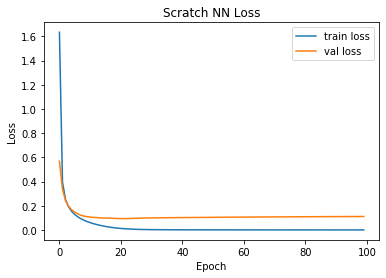

In [406]:
# 4層のSigmoidネットワーク
layer_1 = Layer(Linear(), Sigmoid(), 784, 400)
layer_2 = Layer(Linear(), Sigmoid(), 400, 200)
layer_3 = Layer(Linear(), Sigmoid(), 200, 100)
output = Layer(Linear(), Softmax(), 100, 10)

params = {'epoch': 100, 
          'lr': 0.01,
          'sigma':  0.1,
          'batch_size': 200,
          }

nn_sig4 = ScratchNeuralNetworkClassifier(layers=[layer_1, layer_2, layer_3, output],
                                    verbose=True, **params)

nn_sig4.fit(X_train, y_train, X_val, y_val)

pred = nn_sig4.predict(X_test)

print("\n Accuracy: {}".format(accuracy_score(y_test, pred)))

plot_loss(nn_sig4)

>３層から４層の変化では学習精度に影響は見られない。

Epoch 10; Loss 86.7458   --Avg Epoch Time 2.0062sec
Epoch 20; Loss 86.1077   --Avg Epoch Time 2.1268sec
Epoch 30; Loss 88.2508   --Avg Epoch Time 1.9887sec
Epoch 40; Loss 87.7885   --Avg Epoch Time 2.4872sec
Epoch 50; Loss 85.6251   --Avg Epoch Time 2.6821sec
Epoch 60; Loss 85.4094   --Avg Epoch Time 2.4744sec
Epoch 70; Loss 87.4289   --Avg Epoch Time 2.2310sec
Epoch 80; Loss 84.9812   --Avg Epoch Time 2.0747sec
Epoch 90; Loss 86.0110   --Avg Epoch Time 2.3764sec
Epoch 100; Loss 86.2450   --Avg Epoch Time 1.9465sec

 Accuracy: 0.0982


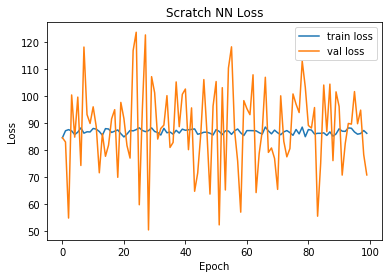

In [33]:
# 4層のtanhネットワーク
layer_1 = Layer(Linear(), Tanh(), 784, 400)
layer_2 = Layer(Linear(), Tanh(), 400, 200)
layer_3 = Layer(Linear(), Tanh(), 200, 100)
output = Layer(Linear(), Softmax(), 100, 10)

params = {'epoch': 100, 
          'lr': 0.01,
          'sigma':  0.1,
          'batch_size': 200,
          }

nn_tanh4 = ScratchNeuralNetworkClassifier(layers=[layer_1, layer_2, layer_3, output],
                                    verbose=True, **params)

nn_tanh4.fit(X_train, y_train, X_val, y_val)

pred = nn_tanh4.predict(X_test)

print("\n Accuracy: {}".format(accuracy_score(y_test, pred)))

plot_loss(nn_tanh4)

>活性化関数をtanhに変更したら学習精度が大幅に悪化。パラメータ調整で改善できるか試す。

Epoch 10; Loss 2.3031   --Avg Epoch Time 3.4019sec
Epoch 20; Loss 2.1358   --Avg Epoch Time 3.7896sec
Epoch 30; Loss 1.0979   --Avg Epoch Time 3.9387sec
Epoch 40; Loss 0.4770   --Avg Epoch Time 6.8396sec
Epoch 50; Loss 0.3441   --Avg Epoch Time 4.2216sec
Epoch 60; Loss 0.2673   --Avg Epoch Time 3.5269sec
Epoch 70; Loss 0.2161   --Avg Epoch Time 3.9395sec
Epoch 80; Loss 0.1761   --Avg Epoch Time 3.9703sec
Epoch 90; Loss 0.1469   --Avg Epoch Time 4.0634sec
Epoch 100; Loss 0.1252   --Avg Epoch Time 4.8820sec

 Accuracy: 0.9584


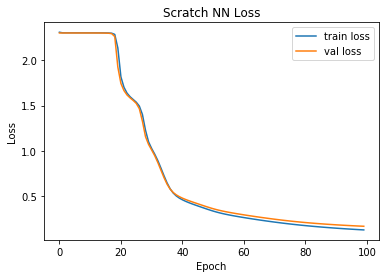

In [409]:
# 3層のtanhネットワーク（パラメータ調整済み）
layer_1 = Layer(Linear(), Tanh(), 784, 400)
layer_2 = Layer(Linear(), Tanh(), 400, 200)
output = Layer(Linear(), Softmax(), 200, 10)

params = {'epoch': 100, 
          'lr': 0.0001,
          'sigma':  0.0001,
          'batch_size': 20,
          }

nn_tanh3 = ScratchNeuralNetworkClassifier(layers=[layer_1, layer_2, output],
                                    verbose=True, **params)

nn_tanh3.fit(X_train, y_train, X_val, y_val)

pred = nn_tanh3.predict(X_test)

print("\n Accuracy: {}".format(accuracy_score(y_test, pred)))

plot_loss(nn_tanh3)

>学習率とσを下げたところ、学習精度の改善が見られた。シグモイド関数と挙動が違うのはパラメータの初期設定に関係あるのだろうか？

Epoch 10; Loss 2.3038   --Avg Epoch Time 7.1129sec
Epoch 20; Loss 0.4492   --Avg Epoch Time 7.2382sec
Epoch 30; Loss 0.0941   --Avg Epoch Time 6.2894sec
Epoch 40; Loss 0.0396   --Avg Epoch Time 6.5498sec
Epoch 50; Loss 0.0935   --Avg Epoch Time 6.5490sec
Epoch 60; Loss 0.0121   --Avg Epoch Time 7.4501sec
Epoch 70; Loss 0.0058   --Avg Epoch Time 7.0395sec
Epoch 80; Loss 0.0138   --Avg Epoch Time 8.4898sec
Epoch 90; Loss 0.0039   --Avg Epoch Time 6.5532sec
Epoch 100; Loss 0.0032   --Avg Epoch Time 6.2615sec

 Accuracy: 0.9776


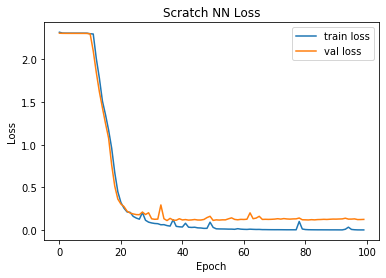

In [410]:
# 8層のsigmoidネットワーク
layer_1 = Layer(Linear(), Sigmoid(), 784, 1000)
layer_2 = Layer(Linear(), Sigmoid(), 1000, 600)
layer_3 = Layer(Linear(), Sigmoid(), 600, 300)
layer_4 = Layer(Linear(), Sigmoid(), 300, 150)
layer_5 = Layer(Linear(), Sigmoid(), 150, 80)
layer_6 = Layer(Linear(), Sigmoid(), 80, 40)
layer_7 = Layer(Linear(), Sigmoid(), 40, 20)
output = Layer(Linear(), Softmax(), 20, 10)

params = {'epoch': 100, 
          'lr': 0.01,
          'sigma':  0.1,
          'batch_size': 200,
          }

nn_sig8 = ScratchNeuralNetworkClassifier(layers=[layer_1, layer_2, layer_3, layer_4, 
                                                 layer_5, layer_6, layer_7, output],
                                                 verbose=True, **params)

nn_sig8.fit(X_train, y_train, X_val, y_val)

pred = nn_sig8.predict(X_test)

print("\n Accuracy: {}".format(accuracy_score(y_test, pred)))

plot_loss(nn_sig8)

>レイヤーを倍加しても結果は変わらなかった。必ずしも層を増やしたらモデルの精度が良くなるわけではない。おそらくこのデータセットに対しては３〜４層ほどで収束（飽和）するため、これ以上層を増やしても計算時間が長くなるだけで精度は良くならない。ただ、今回は限定された活性化関数やパラメータ初期化法での検証だったため、今後は様々な手法も試してみたい。